In [20]:
import pandas as pd
sessions = pd.read_csv('sessions.csv')
sessions

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,6265388,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:18,Test
1,6265388,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:47,Test
2,6265388,100019786_4272121951,703380671_89376183829_330646,start,2017-04-15 15:13:33,Test
3,6265388,100019786_4272121951,703380671_89376183829_330646,step_1,2017-04-15 15:13:46,Test
4,6265388,100019786_4272121951,703380671_89376183829_330646,step_2,2017-04-15 15:14:21,Test
...,...,...,...,...,...,...
321304,7042750,999998529_89539814462,583327415_19513940564_488564,step_1,2017-04-12 12:09:47,Control
321305,7042750,999998529_89539814462,583327415_19513940564_488564,step_2,2017-04-12 11:50:31,Control
321306,7042750,999998529_89539814462,583327415_19513940564_488564,step_2,2017-04-12 11:55:05,Control
321307,7042750,999998529_89539814462,583327415_19513940564_488564,step_3,2017-04-12 11:52:11,Control


In [2]:
sessions['visit_id'].nunique()

69205

In [37]:
sorted_sessions = sessions.sort_values(by = ['client_id', 'date_time'])
sorted_sessions.head(15)

,client_id,visitor_id,visit_id,process_step,date_time,Variation
108459,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
108460,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
108461,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
108462,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
108458,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
202719,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,Test
202720,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,Test
202721,647,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,Test
202722,647,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,Test
202718,647,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,Test


In [47]:
total_visits = sessions['visit_id'].nunique()
total_visits

69205

In [45]:
visits_with_confirm = sessions[sessions['process_step'] == 'confirm']['visit_id'].nunique()
conversion_rate = visits_with_confirm / total_visits
print(f"Conversion rate to 'confirm': {conversion_rate:.2%}")

Conversion rate to 'confirm': 54.45%


In [ ]:
visit_counts = sessions['visit_id'].value_counts()

login_only_ids = visit_counts[visit_counts == 1].index

login_only_sessions = sessions[(sessions['visit_id'].isin(login_only_ids)) & 
                                (sessions['process_step'] == 'start')]

login_only_count = login_only_sessions['visit_id'].nunique()

total_visits = sessions['visit_id'].nunique()

login_only_rate = login_only_count / total_visits

print(f"Login-only visit rate: {login_only_rate:.2%}")

Login-only visit rate: 15.76%


In [54]:
sessions[sessions['visit_id'].isin(login_only_ids)]['process_step'].value_counts()

process_step
start      7646
confirm    3142
step_3       52
step_1       42
step_2       28
Name: count, dtype: int64

In [21]:
clients = pd.read_csv('df_final_demo.txt')
clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [ ]:
import pandas as pd

numeric_cols = [
    'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
    'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
]

clients[numeric_cols] = clients[numeric_cols].apply(pd.to_numeric, errors='coerce')

def compute_summary(group):
    return pd.DataFrame({
        'Mean': group[numeric_cols].mean(),
        'Median': group[numeric_cols].median(),
        'Mode': group[numeric_cols].mode().iloc[0],
        'Max': group[numeric_cols].max()
    })

summary_by_gender = clients.groupby('gendr').apply(compute_summary)

summary_by_gender = summary_by_gender.reset_index(level=1)

print(summary_by_gender)

                level_1           Mean     Median      Mode          Max
gendr                                                                   
F        clnt_tenure_yr      14.792491     14.000     15.00        62.00
F      clnt_tenure_mnth     183.423591    173.000    189.00       749.00
F              clnt_age      49.520950     51.000     52.50        95.50
F             num_accts       2.229183      2.000      2.00         8.00
F                   bal  135561.333147  69028.800  22489.06   8292996.21
F          calls_6_mnth       3.090785      3.000      1.00         7.00
F         logons_6_mnth       5.287127      5.000      3.00         9.00
M        clnt_tenure_yr      14.882608     14.000     15.00        55.00
M      clnt_tenure_mnth     184.366886    174.000    189.00       669.00
M              clnt_age      48.582364     49.500     55.50        96.00
M             num_accts       2.327980      2.000      2.00         7.00
M                   bal  212299.868067  85759.675  

C:\Users\hsdc\AppData\Local\Temp\ipykernel_13384\4109024869.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_by_gender = clients.groupby('gendr').apply(compute_summary)


In [7]:
gender_counts = clients['gendr'].value_counts(dropna=False)

gender_percentages = clients['gendr'].value_counts(normalize=True, dropna=False) * 100

gender_summary = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages.round(2)
})
print(gender_summary)

       Count  Percentage
gendr                   
U      24122       34.16
M      23724       33.60
F      22746       32.21
NaN       14        0.02
X          3        0.00


C:\Users\hsdc\AppData\Local\Temp\ipykernel_6232\3738269668.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gendr', y='bal', data=clients, palette='Set2')


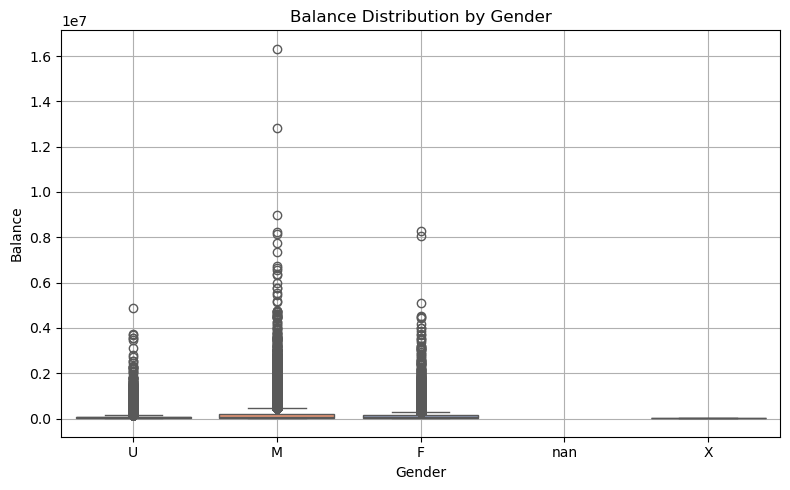

C:\Users\hsdc\AppData\Local\Temp\ipykernel_6232\3738269668.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gendr', y='num_accts', data=clients, palette='Set2')


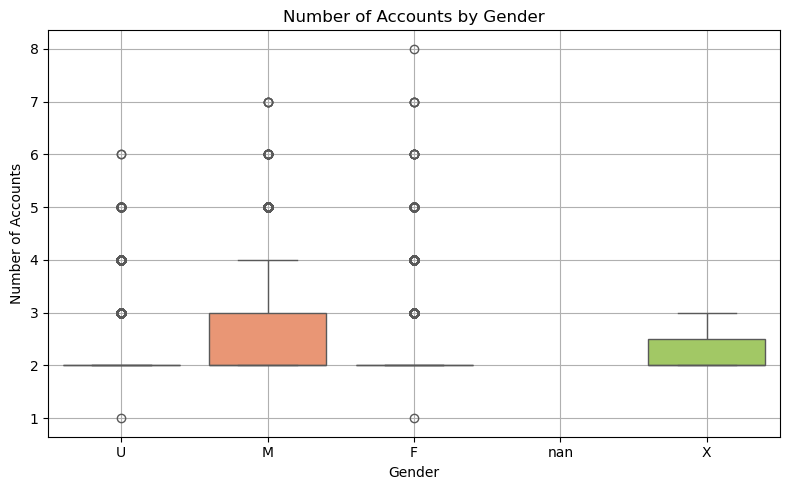

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clients['gendr'] = clients['gendr'].astype(str)

plt.figure(figsize=(8, 5))
sns.boxplot(x='gendr', y='bal', data=clients, palette='Set2')
plt.title('Balance Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='gendr', y='num_accts', data=clients, palette='Set2')
plt.title('Number of Accounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.tight_layout()
plt.show()

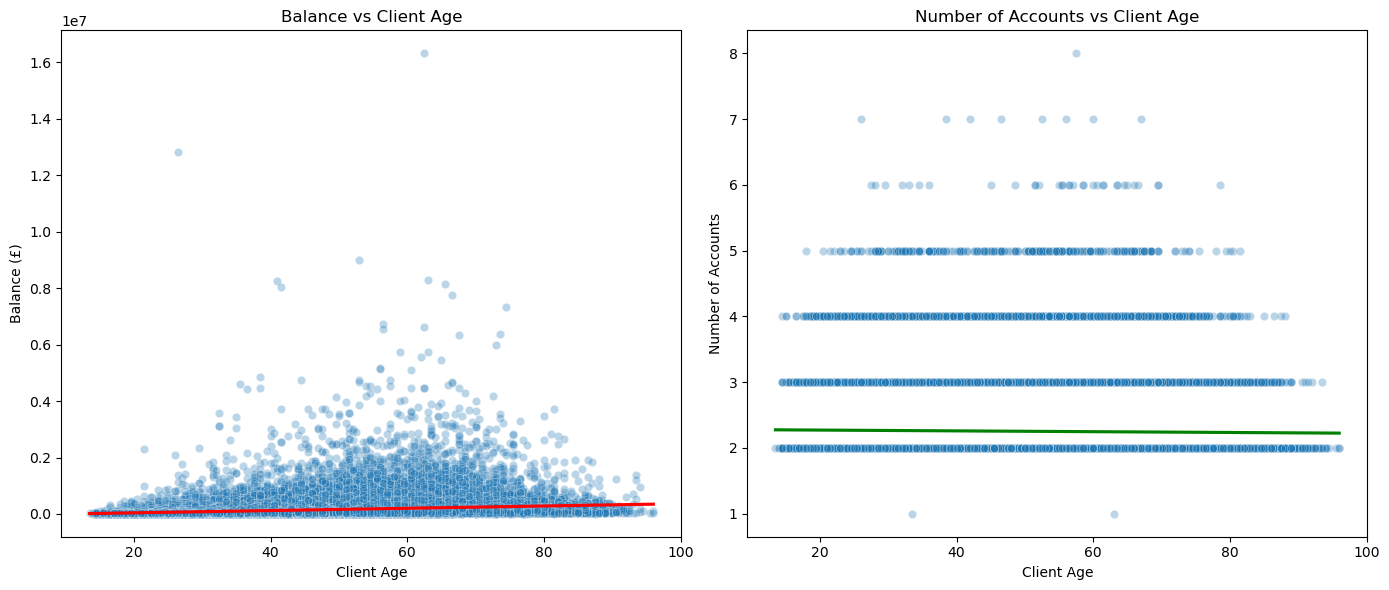

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=clients, x='clnt_age', y='bal', alpha=0.3)
sns.regplot(data=clients, x='clnt_age', y='bal', scatter=False, color='red')
plt.title('Balance vs Client Age')
plt.xlabel('Client Age')
plt.ylabel('Balance (£)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=clients, x='clnt_age', y='num_accts', alpha=0.3)
sns.regplot(data=clients, x='clnt_age', y='num_accts', scatter=False, color='green')
plt.title('Number of Accounts vs Client Age')
plt.xlabel('Client Age')
plt.ylabel('Number of Accounts')

plt.tight_layout()
plt.show()

In [22]:
client_row = clients[clients['client_id'] == 9008485]

client_row

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
41035,9008485,13.0,161.0,68.0,F,2.0,149367.17,5.0,8.0


In [17]:
merged_df = sessions.merge(clients, on='client_id', how='inner')

filtered_df = merged_df[
    (merged_df['process_step'].isin(['step1', 'step2'])) &  
    (merged_df['date_time'] >= '2024-01-01')]  


merged_df.to_csv('final_data.csv')

In [ ]:
steps_per_visit = merged_df.groupby('visit_id')['process_step'].count().reset_index()
steps_per_visit.columns = ['visit_id', 'step_count']

step_distribution = steps_per_visit['step_count'].value_counts().reset_index()
step_distribution.columns = ['steps_completed', 'visit_count']
step_distribution = step_distribution.sort_values('steps_completed')

total_visits = step_distribution['visit_count'].sum()
step_distribution['percentage'] = (step_distribution['visit_count'] / total_visits * 100).round(2)

step_distribution['step_label'] = step_distribution['steps_completed'].astype(str) + ' steps'

print("Step Distribution Summary:")
print(step_distribution)

visit_steps_detail = merged_df.groupby('visit_id').agg({
    'process_step': lambda x: list(x),
    'client_id': 'first'  
}).reset_index()

visit_steps_detail['unique_steps'] = visit_steps_detail['process_step'].apply(lambda x: len(set(x)))
visit_steps_detail['steps_list'] = visit_steps_detail['process_step'].apply(lambda x: ', '.join(sorted(set(x))))

tableau_data = visit_steps_detail.merge(clients, on='client_id', how='left')

print("\nSample of detailed visit data:")
print(tableau_data[['visit_id', 'unique_steps', 'steps_list']].head())

step_distribution.to_csv('step_distribution_pie_chart.csv', index=False)
tableau_data.to_csv('detailed_visit_analysis.csv', index=False)

Step Distribution Summary:
    steps_completed  visit_count  percentage step_label
1                 1        10910       15.76    1 steps
2                 2         8222       11.88    2 steps
6                 3         4586        6.63    3 steps
5                 4         5002        7.23    4 steps
0                 5        22029       31.83    5 steps
3                 6         5395        7.80    6 steps
4                 7         5072        7.33    7 steps
7                 8         2382        3.44    8 steps
8                 9         2022        2.92    9 steps
9                10         1127        1.63   10 steps
10               11          801        1.16   11 steps
11               12          518        0.75   12 steps
12               13          323        0.47   13 steps
13               14          229        0.33   14 steps
14               15          166        0.24   15 steps
15               16          114        0.16   16 steps
16               17  

In [19]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,6265388,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:18,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0
1,6265388,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:47,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0
2,6265388,100019786_4272121951,703380671_89376183829_330646,start,2017-04-15 15:13:33,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0
3,6265388,100019786_4272121951,703380671_89376183829_330646,step_1,2017-04-15 15:13:46,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0
4,6265388,100019786_4272121951,703380671_89376183829_330646,step_2,2017-04-15 15:14:21,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,7042750,999998529_89539814462,583327415_19513940564_488564,step_1,2017-04-12 12:09:47,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0
321305,7042750,999998529_89539814462,583327415_19513940564_488564,step_2,2017-04-12 11:50:31,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0
321306,7042750,999998529_89539814462,583327415_19513940564_488564,step_2,2017-04-12 11:55:05,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0
321307,7042750,999998529_89539814462,583327415_19513940564_488564,step_3,2017-04-12 11:52:11,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sessions_per_client = merged_df.groupby('client_id').visit_id.nunique().reset_index()
sessions_per_client.rename(columns={'visit_id': 'session_count'}, inplace=True)

client_sessions = pd.merge(merged_df.drop_duplicates(subset=['client_id']), 
                            sessions_per_client, 
                            on='client_id')

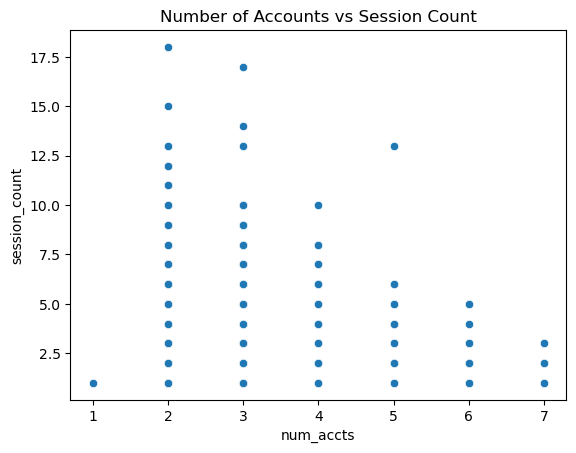

In [27]:
sns.scatterplot(data=client_sessions, x='num_accts', y='session_count')
plt.title('Number of Accounts vs Session Count')
plt.show()

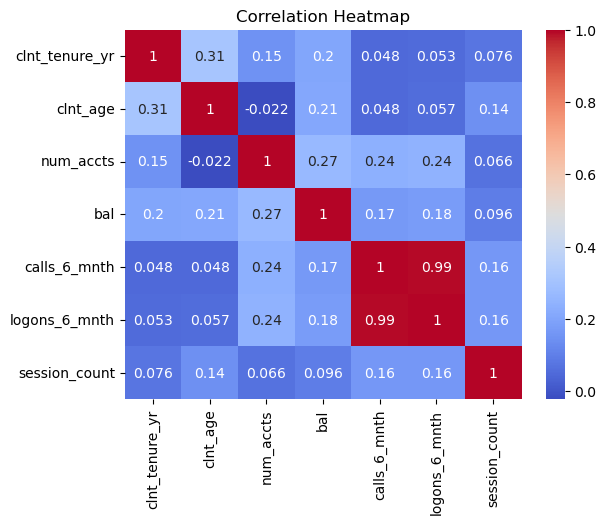

In [28]:
correlation = client_sessions[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal', 
                                'calls_6_mnth', 'logons_6_mnth', 'session_count']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

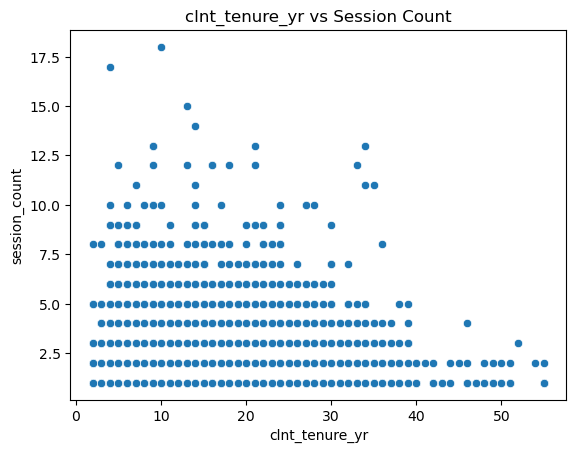

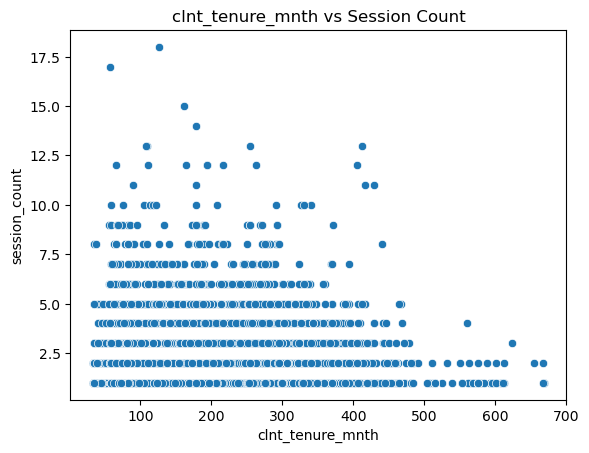

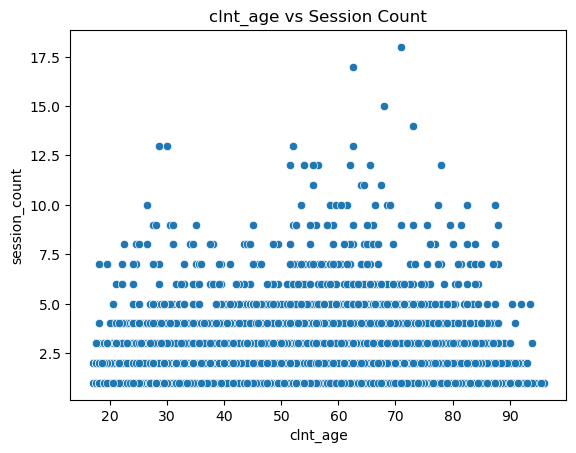

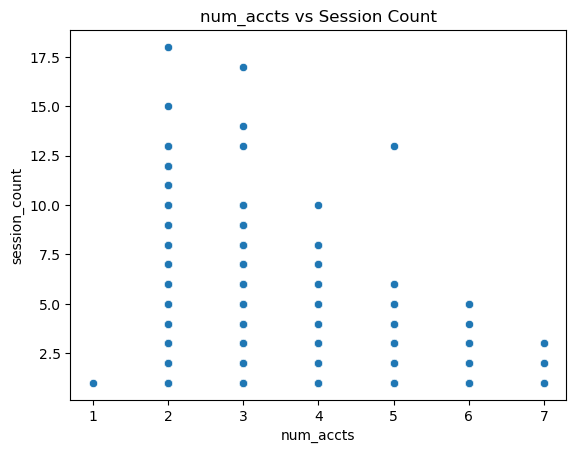

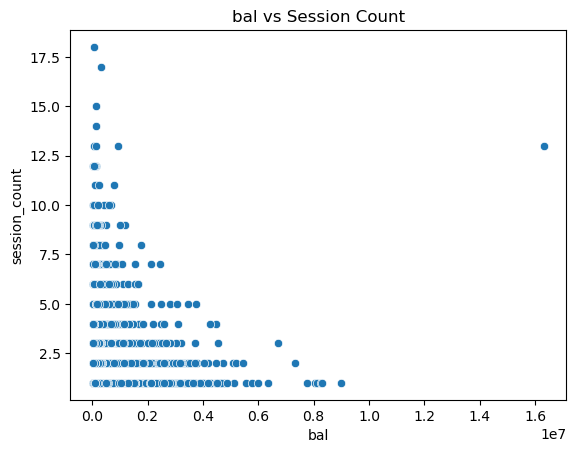

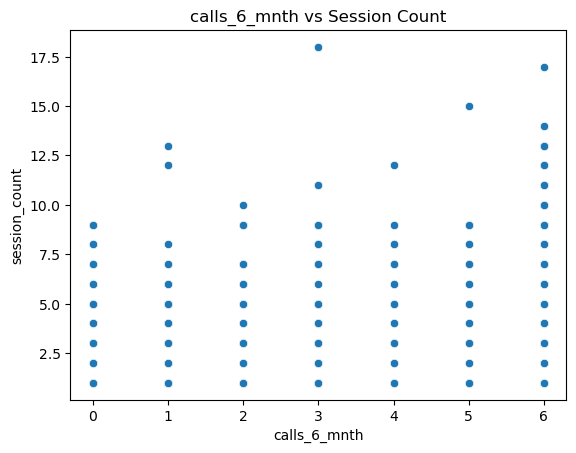

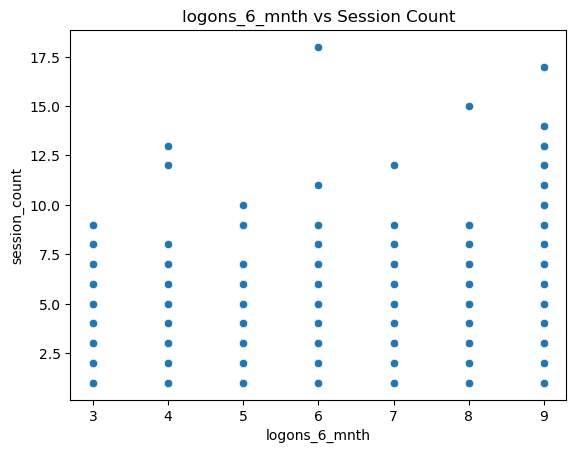

In [29]:
numeric_cols = [
    'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
    'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
]

for col in numeric_cols:
    sns.scatterplot(data=client_sessions, x=col, y='session_count')
    plt.title(f'{col} vs Session Count')
    plt.show()

In [ ]:
confirm_visits = merged_df[merged_df['process_step'] == 'confirm']

In [ ]:
confirm_counts = confirm_visits.groupby('client_id')['visit_id'].nunique().reset_index()
confirm_counts.rename(columns={'visit_id': 'confirm_session_count'}, inplace=True)


In [ ]:
client_info = merged_df.drop_duplicates(subset=['client_id'])

client_confirm_data = pd.merge(client_info, confirm_counts, on='client_id', how='left')

client_confirm_data['confirm_session_count'] = client_confirm_data['confirm_session_count'].fillna(0)


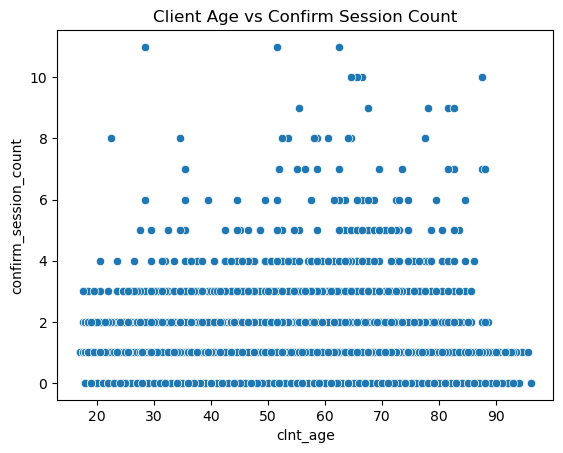

In [ ]:
sns.scatterplot(data=client_confirm_data, x='clnt_age', y='confirm_session_count')
plt.title('Client Age vs Confirm Session Count')
plt.show()


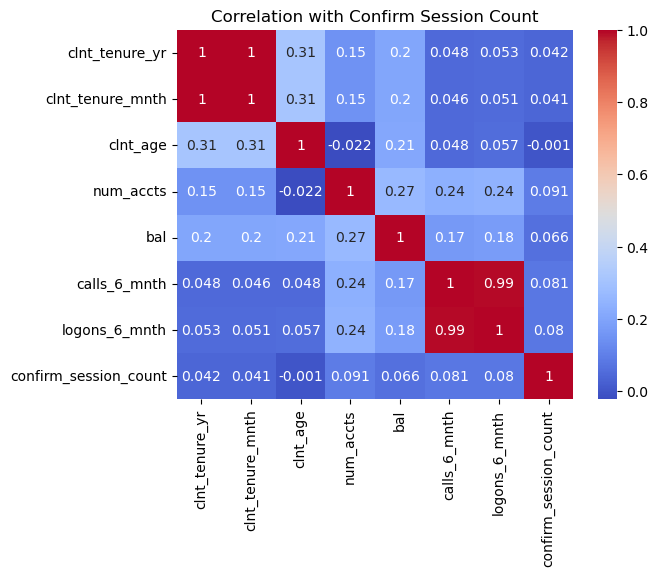

In [34]:
numeric_cols = [
    'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
    'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
    'confirm_session_count'
]

correlation = client_confirm_data[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation with Confirm Session Count')
plt.show()


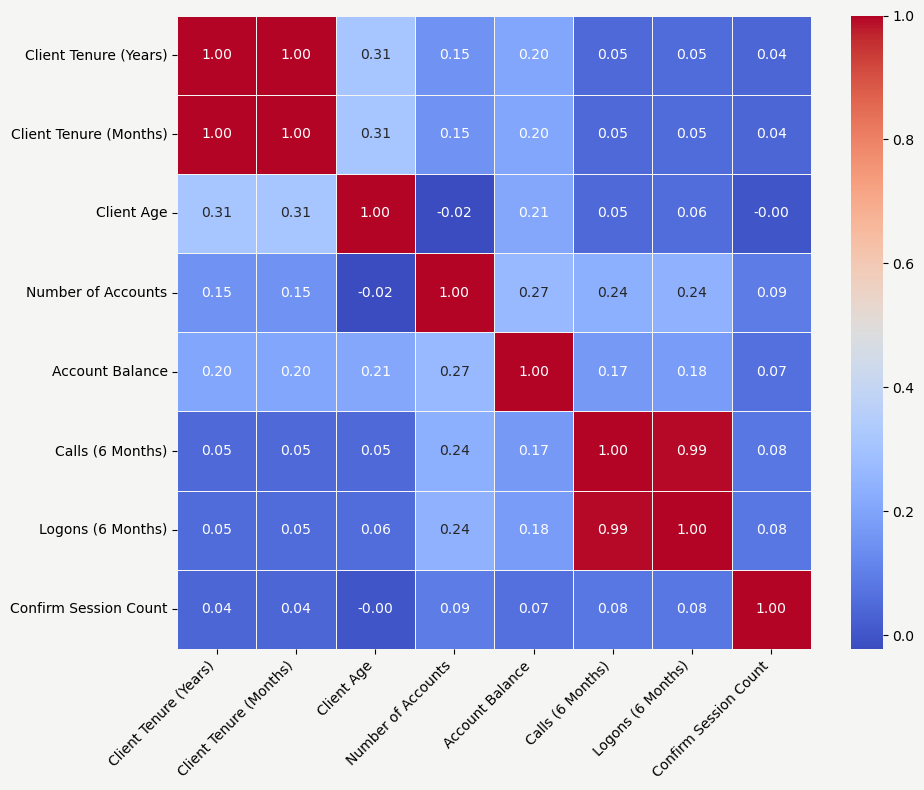

In [ ]:
label_mapping = {
    'clnt_tenure_yr': 'Client Tenure (Years)',
    'clnt_tenure_mnth': 'Client Tenure (Months)',
    'clnt_age': 'Client Age',
    'num_accts': 'Number of Accounts',
    'bal': 'Account Balance',
    'calls_6_mnth': 'Calls (6 Months)',
    'logons_6_mnth': 'Logons (6 Months)',
    'confirm_session_count': 'Confirm Session Count'
}

numeric_cols = list(label_mapping.keys())

corr_data = client_confirm_data[numeric_cols].corr()

corr_data.rename(index=label_mapping, columns=label_mapping, inplace=True)

plt.figure(figsize=(10, 8))

plt.gca().set_facecolor('#F5F5F4')
plt.gcf().patch.set_facecolor('#F5F5F4')

sns.heatmap(
    corr_data, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar=True, 
    square=True,
    linewidths=0.5,
    linecolor='#F5F5F4'  
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

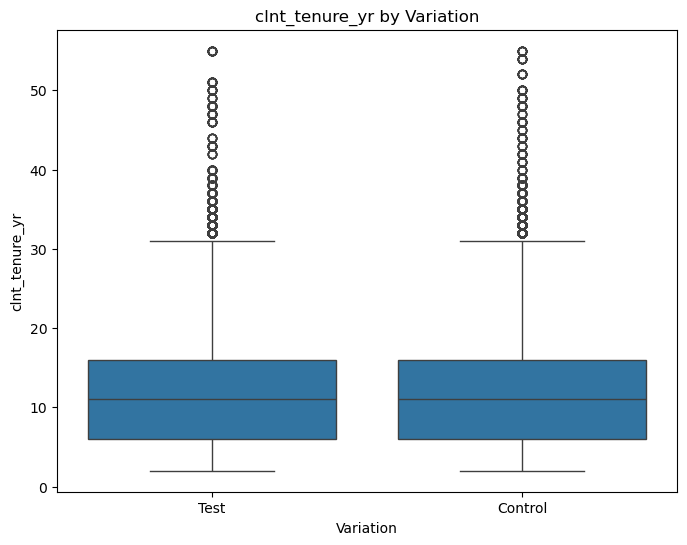

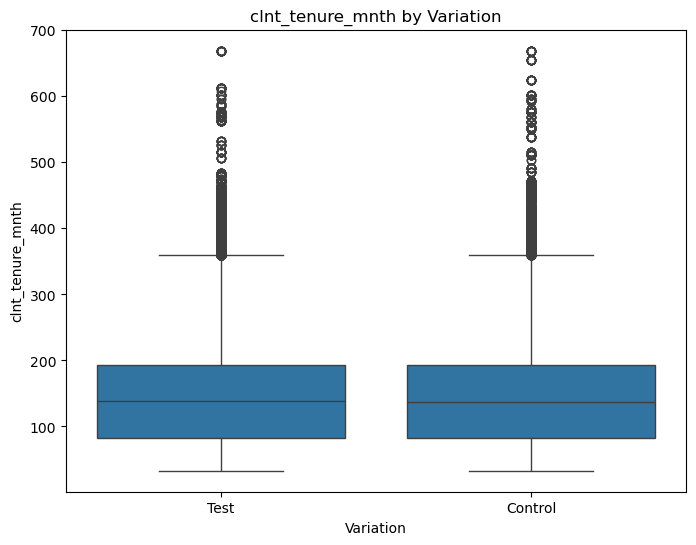

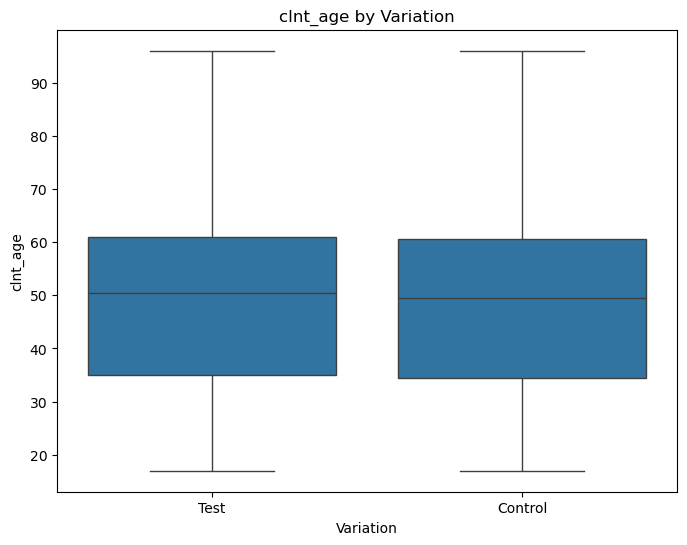

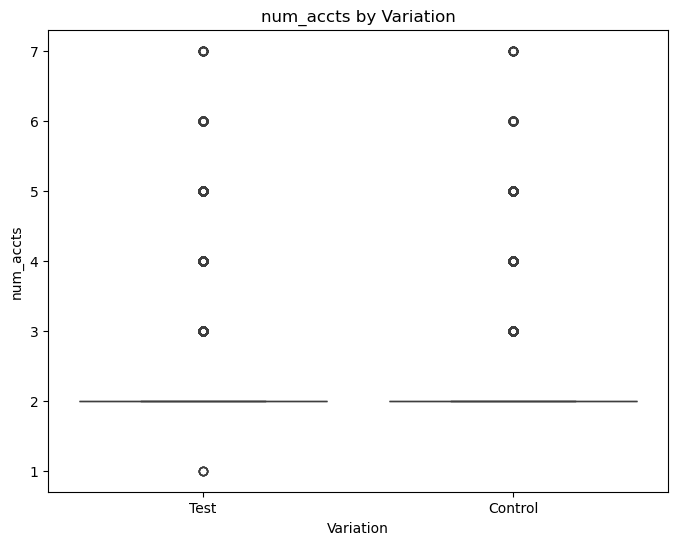

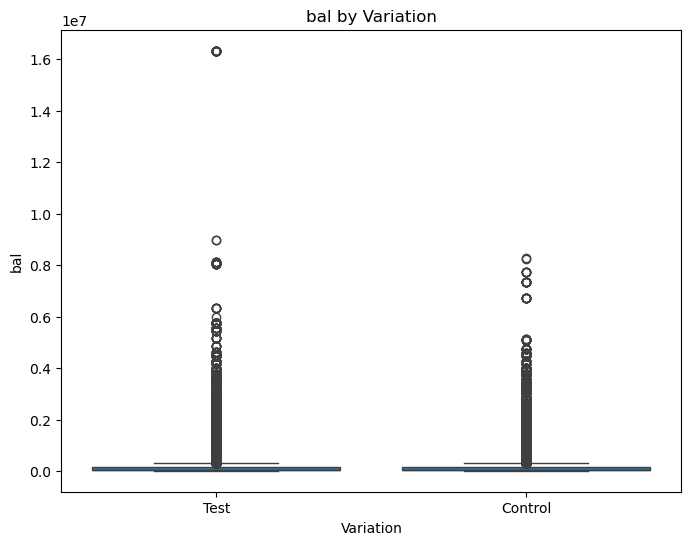

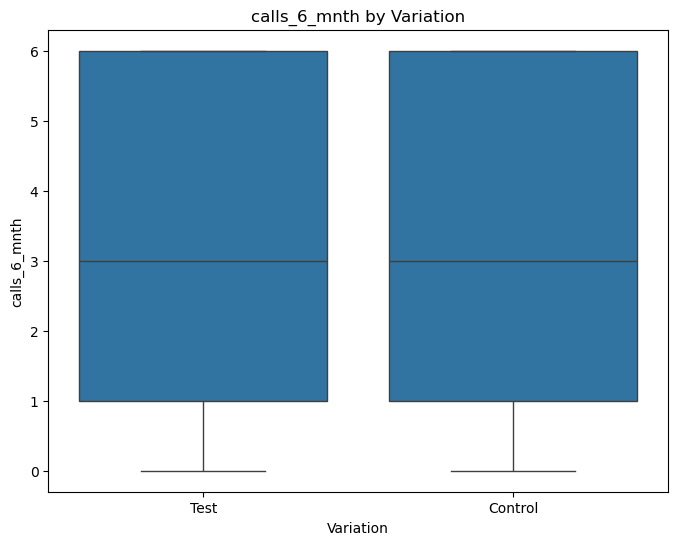

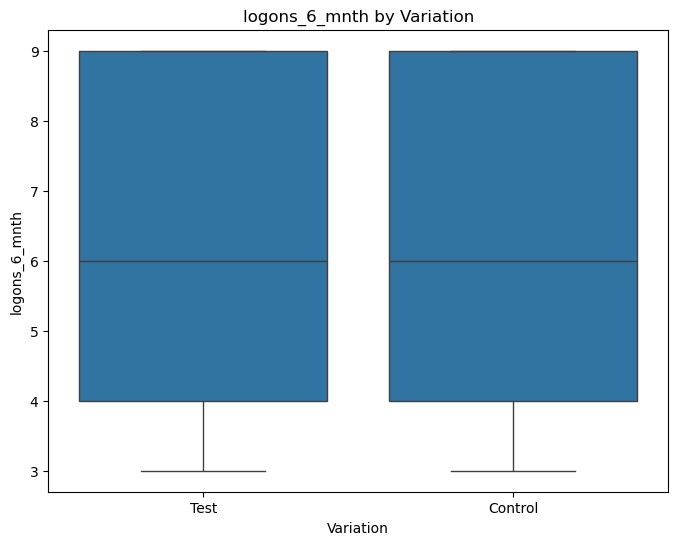

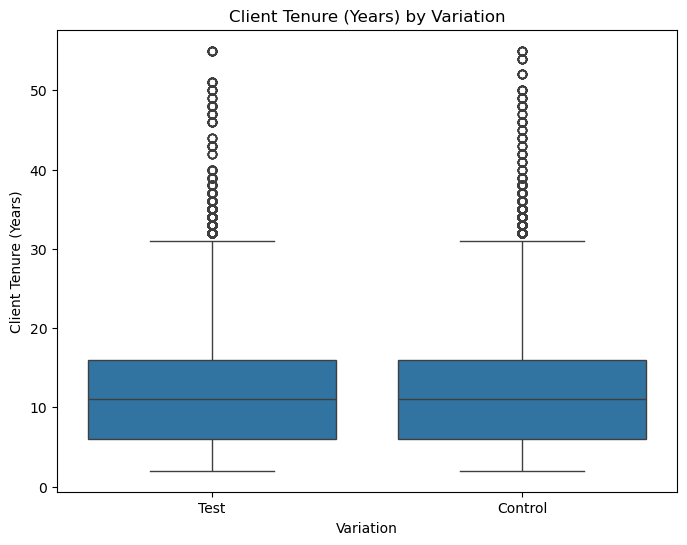

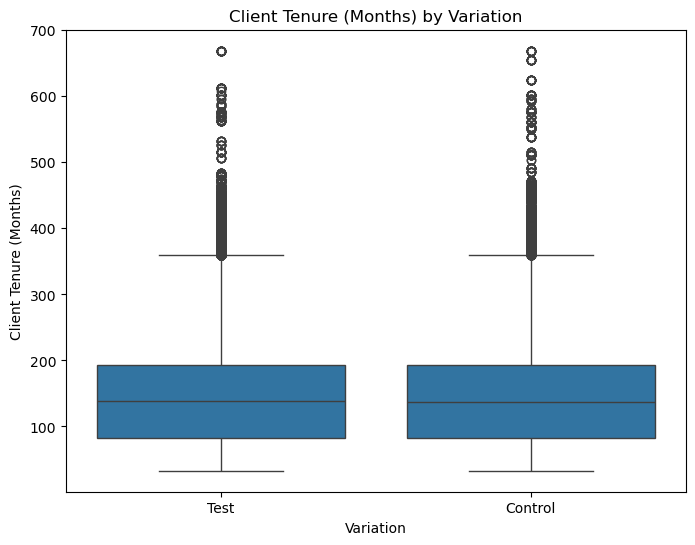

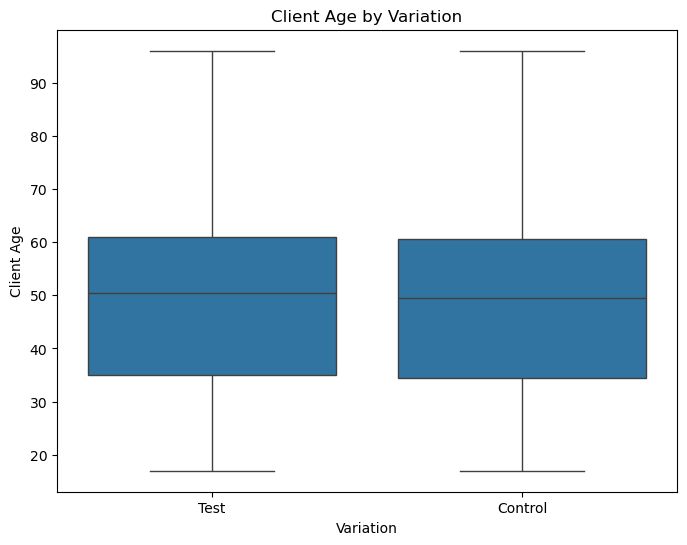

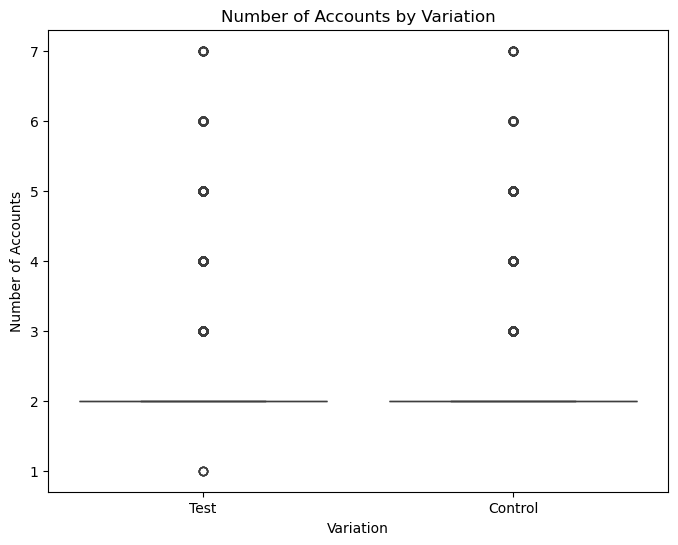

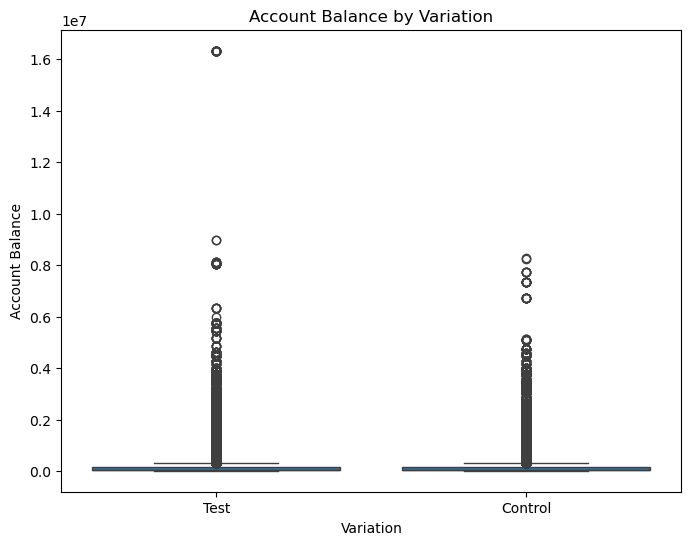

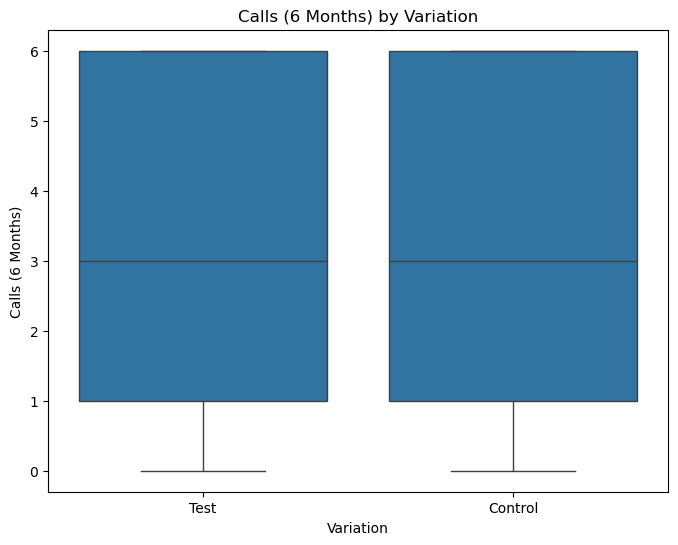

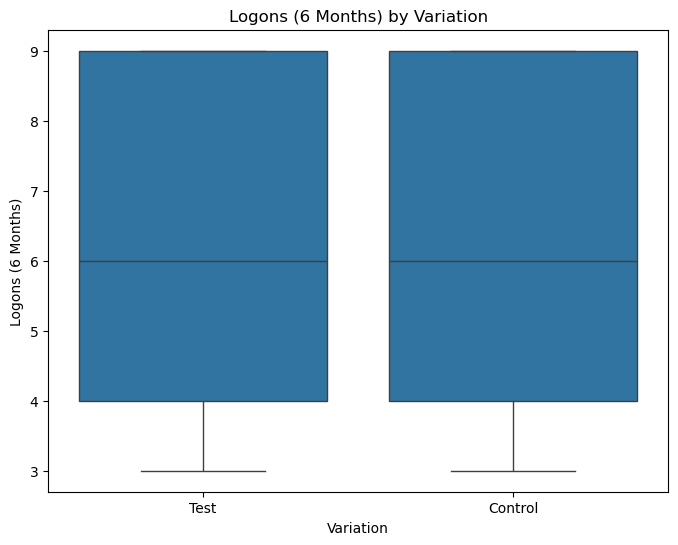

In [45]:
numeric_cols = [
    'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
    'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=merged_df, x='Variation', y=col)
    plt.title(f'{col} by Variation')
    plt.show()

label_mapping = {
    'clnt_tenure_yr': 'Client Tenure (Years)',
    'clnt_tenure_mnth': 'Client Tenure (Months)',
    'clnt_age': 'Client Age',
    'num_accts': 'Number of Accounts',
    'bal': 'Account Balance',
    'calls_6_mnth': 'Calls (6 Months)',
    'logons_6_mnth': 'Logons (6 Months)'
}

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=merged_df, x='Variation', y=col)
    plt.title(f"{label_mapping[col]} by Variation")
    plt.ylabel(label_mapping[col])
    plt.xlabel('Variation')
    plt.show()


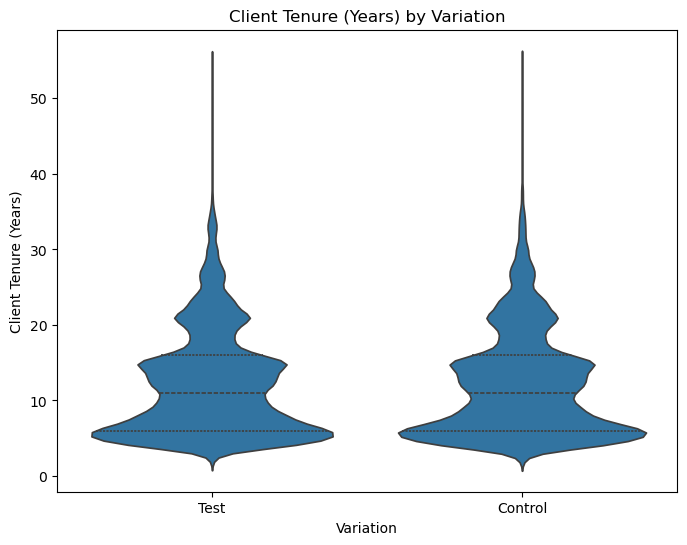

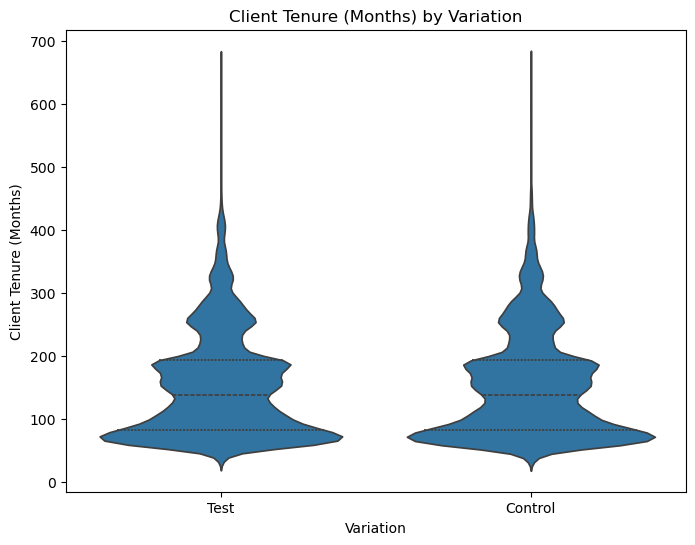

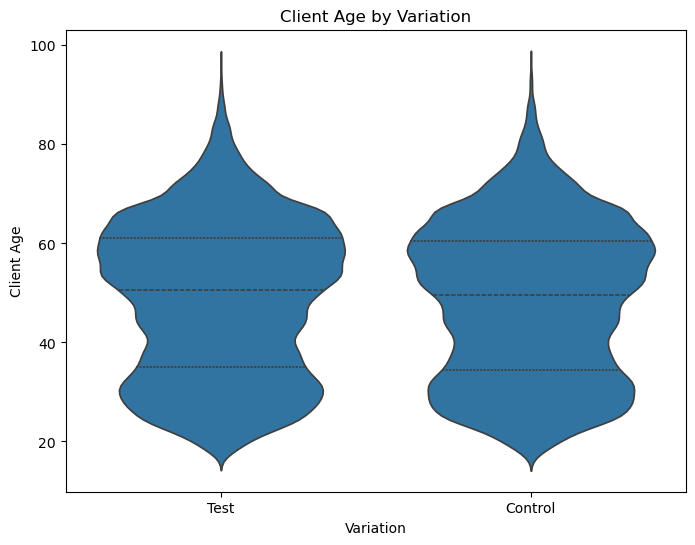

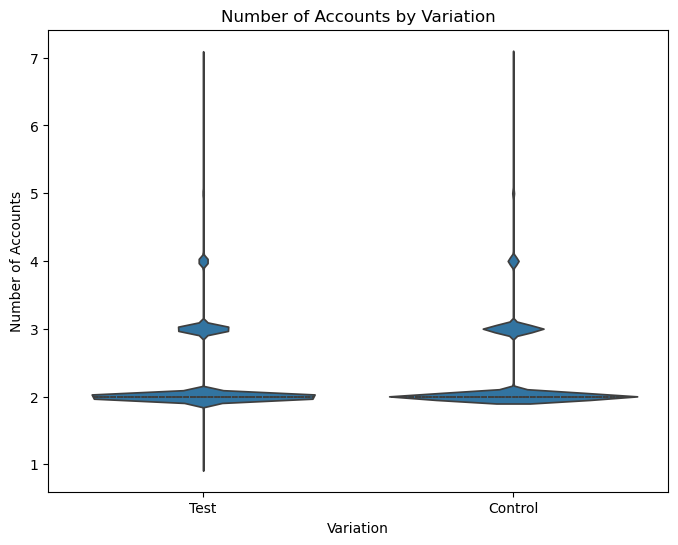

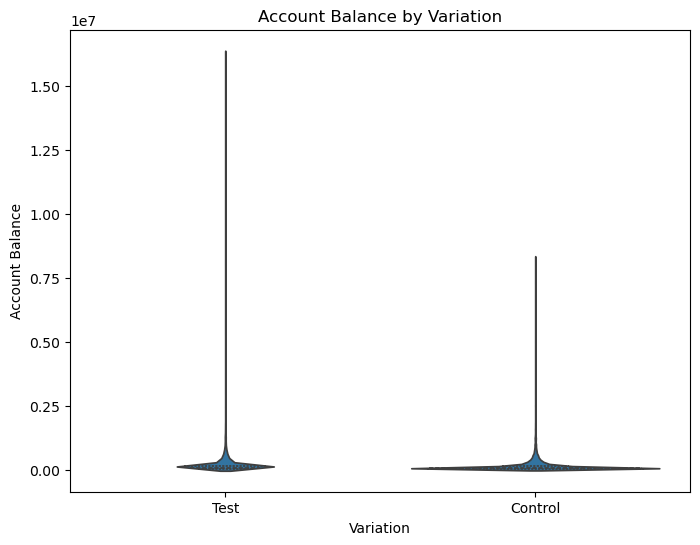

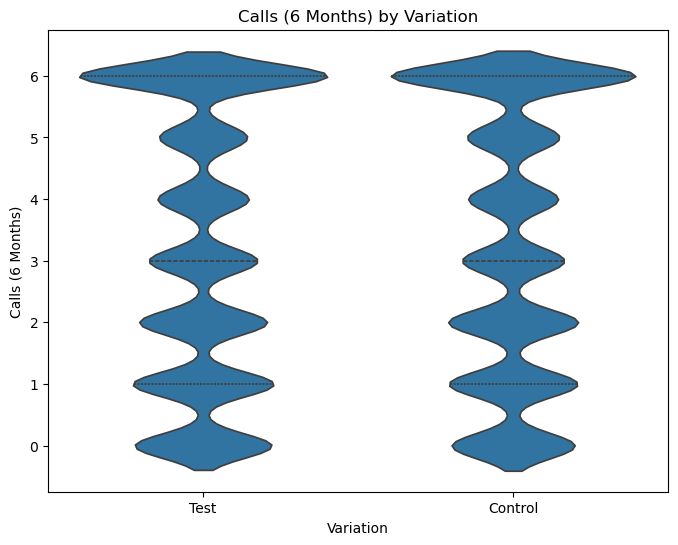

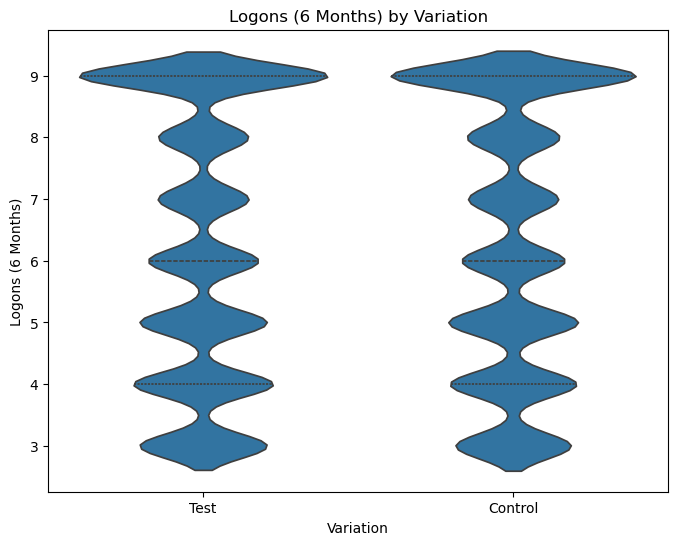

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=merged_df, x='Variation', y=col, inner='quartile')
    plt.title(f"{label_mapping[col]} by Variation")
    plt.ylabel(label_mapping[col])
    plt.xlabel('Variation')
    plt.show()

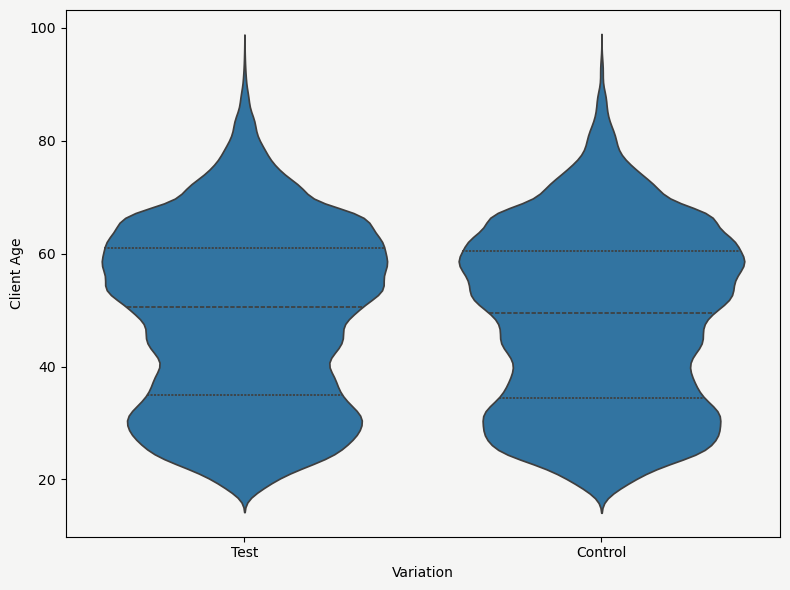

In [43]:
plt.figure(figsize=(8, 6))

plt.gca().set_facecolor('#F5F5F4')
plt.gcf().patch.set_facecolor('#F5F5F4')

sns.violinplot(data=merged_df, x='Variation', y='clnt_age', inner='quartile')

plt.ylabel("Client Age")
plt.tight_layout()
plt.show()

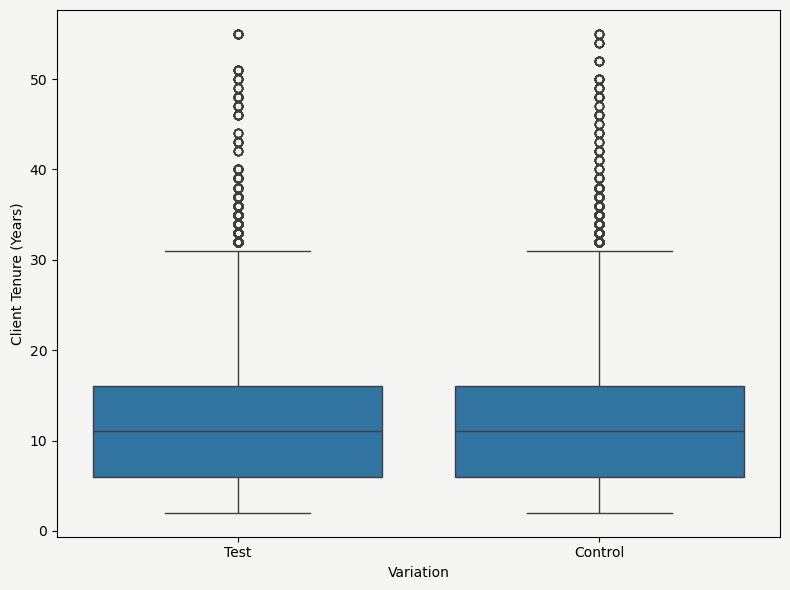

In [44]:
plt.figure(figsize=(8, 6))

plt.gca().set_facecolor('#F5F5F4')
plt.gcf().patch.set_facecolor('#F5F5F4')

sns.boxplot(data=merged_df, x='Variation', y='clnt_tenure_yr')

plt.ylabel("Client Tenure (Years)")
plt.tight_layout()
plt.show()